In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import  variance_inflation_factor

In [2]:
df = pd.read_excel("Testcase.xlsx")

In [3]:
df.head()

,S.No,Project_Size,Project_Complexity,Requirements,Systems_with_func_change,Systems_with_config_change,Systems_with_no_change,Total_test_case,Unnamed: 8
0,49,Small,Medium,35,1,0,3,23,NaN
1,1,Small,Medium,40,0,2,1,28,NaN
2,55,Small,Complex,45,1,1,1,40,NaN
3,34,Small,Complex,49,1,0,3,35,NaN
4,5,Small,Complex,53,0,1,2,34,NaN


In [4]:
df['Project_Size'].value_counts()

Medium    236
Small     174
Large     160
Name: Project_Size, dtype: int64

In [5]:
df['Project_Complexity'].value_counts()

Medium     268
Complex    230
Simple      71
Simple       1
Name: Project_Complexity, dtype: int64

In [6]:
df.isnull().sum()

S.No                            0
Project_Size                    0
Project_Complexity              0
Requirements                    0
Systems_with_func_change        0
Systems_with_config_change      0
Systems_with_no_change          0
Total_test_case                 0
Unnamed: 8                    570
dtype: int64

In [7]:
df.drop(['Unnamed: 8'],axis=1,inplace=True)

<AxesSubplot:>

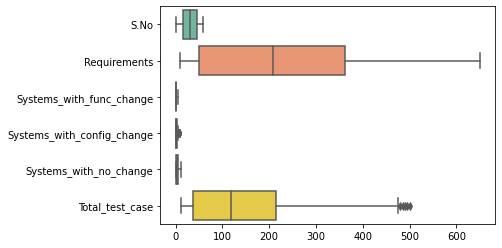

In [8]:
sns.boxplot(data=df,orient='h',palette='Set2')

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
for column_name in df.columns:
    if df[column_name].dtype==object:
        df[column_name]=lb.fit_transform(df[column_name])
    else:
        pass        

In [11]:
df.head()

,S.No,Project_Size,Project_Complexity,Requirements,Systems_with_func_change,Systems_with_config_change,Systems_with_no_change,Total_test_case
0,49,2,1,35,1,0,3,23
1,1,2,1,40,0,2,1,28
2,55,2,0,45,1,1,1,40
3,34,2,0,49,1,0,3,35
4,5,2,0,53,0,1,2,34


In [12]:
df.drop(['S.No'],axis=1,inplace=True)

In [13]:
#Input Output split
y = df.iloc[:,6]
x = df.iloc[:,df.columns!='Total_test_case']

In [14]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns = ["Feature","VIF_SCORE"])                     
    

In [15]:
vif_score(x)

,Feature,VIF_SCORE
0,Project_Size,15.819593
1,Project_Complexity,3.343921
2,Requirements,26.064410
3,Systems_with_func_change,2.700807
4,Systems_with_config_change,5.226820
5,Systems_with_no_change,7.602245


In [16]:
#Input output split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [17]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [18]:
dt_model = DT.fit(x_train,y_train)

In [19]:
dt_ypred = dt_model.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
score=r2_score(y_test,dt_ypred)
print('r2 socre is',score)

r2 socre is 0.9880320550288862


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [23]:
rf_model = rf.fit(x_train,y_train)

In [24]:
y_rfpred = rf_model.predict(x_test)

In [25]:
score=r2_score(y_test,y_rfpred)
print('r2 score is',score)

r2 score is 0.9870114943944068


In [26]:
import xgboost as xgb

In [27]:
model_xgb = xgb.XGBRegressor()

In [28]:
xgbr = model_xgb.fit(x_train,y_train)

In [29]:
y_xgbpred = xgbr.predict(x_test)

In [30]:
score_xg=r2_score(y_test,y_xgbpred)
print('r2 score is',score_xg)

r2 score is 0.9886627639964183


In [31]:
y_xgbtrain = xgbr.predict(x_train)

In [32]:
score_xgtrain=r2_score(y_train,y_xgbtrain)
print('r2 score is',score_xgtrain)

r2 score is 0.999998495613926


In [33]:
df['Project_Size'].value_counts()

1    236
2    174
0    160
Name: Project_Size, dtype: int64

In [34]:
df['Project_Complexity'].value_counts()

1    268
0    230
2     71
3      1
Name: Project_Complexity, dtype: int64

In [52]:
import pickle

In [53]:
file = open('testcasepred.pkl.dat',"wb")
pickle.dump(xgbr,file)